# Lab 5.1

- Read the three files into python as dataframes
- Show the DataFrame's shape.
- Standardize header names.
- Rearrange the columns in the dataframe as needed
- Concatenate the three dataframes
- Which columns are numerical?
- Which columns are categorical?
- Understand the meaning of all columns
- Perform the data cleaning operations mentioned so far in class

  - Delete the column education and the number of open complaints from the dataframe.
  - Correct the values in the column customer lifetime value. They are given as a percent, so multiply them by 100 and change `dtype` to `numerical` type.
  - Check for duplicate rows in the data and remove if any.
  - Filter out the data for customers who have an income of 0 or less.
  - Check and deal with `NaN` values.
  
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function.

Read files:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [110]:
file1 = pd.read_csv('data/file1.csv')

In [111]:
file2 = pd.read_csv('data/file2.csv')

In [112]:
file3 = pd.read_csv('data/file3.csv')

In [113]:
file1.info() #4008x11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


In [114]:
file2.info() #996x11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   996 non-null    object 
 1   ST                         996 non-null    object 
 2   GENDER                     991 non-null    object 
 3   Education                  996 non-null    object 
 4   Customer Lifetime Value    992 non-null    object 
 5   Income                     996 non-null    int64  
 6   Monthly Premium Auto       996 non-null    int64  
 7   Number of Open Complaints  996 non-null    object 
 8   Total Claim Amount         996 non-null    float64
 9   Policy Type                996 non-null    object 
 10  Vehicle Class              996 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 85.7+ KB


In [115]:
file3.info()#7070x100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   7070 non-null   object 
 1   State                      7070 non-null   object 
 2   Customer Lifetime Value    7070 non-null   float64
 3   Education                  7070 non-null   object 
 4   Gender                     7070 non-null   object 
 5   Income                     7070 non-null   int64  
 6   Monthly Premium Auto       7070 non-null   int64  
 7   Number of Open Complaints  7070 non-null   int64  
 8   Policy Type                7070 non-null   object 
 9   Total Claim Amount         7070 non-null   float64
 10  Vehicle Class              7070 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 607.7+ KB


In [116]:
def colset(df):
    cols = []  
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols

In [117]:
colset(file3)

In [118]:
colset(file1)

In [119]:
colset(file2)

In [120]:
file1.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [121]:
file2.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'total_claim_amount', 'policy_type', 'vehicle_class'],
      dtype='object')

In [122]:
file3.columns

Index(['customer', 'state', 'customer_lifetime_value', 'education', 'gender',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'total_claim_amount', 'vehicle_class'],
      dtype='object')

In [123]:
#rename state(file3) as st 
#ordenar

In [124]:
file3 = file3.rename(columns={'state':'st'})

In [125]:
file2 = file2[['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount']]

In [126]:
file3 = file3[['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount']]

In [127]:
data = pd.concat([file1, file2, file3], axis=0)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12074 entries, 0 to 7069
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 9137 non-null   object 
 1   st                       9137 non-null   object 
 2   gender                   9015 non-null   object 
 3   customer_lifetime_value  9130 non-null   object 
 4   income                   9137 non-null   float64
 5   monthly_premium_auto     9137 non-null   float64
 6   policy_type              9137 non-null   object 
 7   vehicle_class            9137 non-null   object 
 8   total_claim_amount       9137 non-null   float64
dtypes: float64(3), object(6)
memory usage: 943.3+ KB


In [129]:
#CAT: Customer, st, gender, education, CLV, NOC?, policy type, vehicle class
#NUM: income, MPA, TCA

In [130]:
data = data.drop('education', axis = 1)

In [131]:
data = data.drop('number_of_open_complaints', axis = 1)

In [169]:
data.sample(5)


,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
3100,OW31837,California,F,19174.63407,74028.0,118.0,Corporate Auto,SUV,53.076203
6649,XP41644,California,M,818171.5637,30574.0,114.0,Corporate Auto,Sports Car,396.105473
1687,VD19899,California,F,27542.36956,50494.0,114.0,Personal Auto,Two-Door Car,491.322893
513,BX94438,California,F,84700368.0,0.0,113.0,Corporate Auto,SUV,619.973889
717,UO95739,Oregon,M,20644588.0,54704.0,113.0,Personal Auto,SUV,468.176056


In [168]:
data['customer_lifetime_value'] = np.where(data['customer_lifetime_value'].str.contains('%',case=False)==True,pd.to_numeric(data['customer_lifetime_value'][:-1]*100) , pd.to_numeric(data['customer_lifetime_value']*100))

ValueError: Unable to parse string "323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%323912.47%" at position 4008

In [142]:
for i, x in enumerate(data['customer_lifetime_value']):
    if pd.notna(x):
        if type(data['customer_lifetime_value'][i]) == float:
            data['customer_lifetime_value'][i] = x * 100
        else: 
            if '%' in x:
                    data['customer_lifetime_value'][i] =pd.to_numeric(x[:-1])*100
            else:
                data['customer_lifetime_value'][i] =pd.to_numeric(x)*100

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14684\1714952437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_lifetime_value'][i] =pd.to_numeric(x[:-1])*100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14684\1714952437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_lifetime_value'][i] =pd.to_numeric(x[:-1])*100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14684\1714952437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

KeyError: 7070

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12074 entries, 0 to 7069
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 9137 non-null   object 
 1   st                       9137 non-null   object 
 2   gender                   9015 non-null   object 
 3   customer_lifetime_value  9128 non-null   float64
 4   income                   9137 non-null   float64
 5   monthly_premium_auto     9137 non-null   float64
 6   policy_type              9137 non-null   object 
 7   vehicle_class            9137 non-null   object 
 8   total_claim_amount       9137 non-null   float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [173]:
data['customer_lifetime_value'] = pd.to_numeric(data['customer_lifetime_value'], errors='coerce')

In [176]:
data_clean = data.drop_duplicates()

In [177]:
data_clean

,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,6.979536e+07,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1.288743e+08,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,7.645862e+07,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,5.363076e+07,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,2.275402e+05,71941.0,73.0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,6.055619e+06,21604.0,79.0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,2.356075e+05,0.0,85.0,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,2.882406e+06,21941.0,96.0,Personal Auto,Four-Door Car,691.200000


In [178]:
filter_data = data_clean[data_clean['income']<=0]


In [179]:
filter_data

,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,6.979536e+07,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
3,WW63253,California,M,7.645862e+07,0.0,106.0,Corporate Auto,SUV,529.881344
7,CF85061,Arizona,M,7.216100e+07,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
10,SX51350,California,M,4.738992e+07,0.0,67.0,Personal Auto,Four-Door Car,482.400000
...,...,...,...,...,...,...,...,...,...
7059,WZ45103,California,F,2.127924e+05,0.0,76.0,Personal Auto,Four-Door Car,364.800000
7061,RX91025,California,M,4.992921e+05,0.0,185.0,Personal Auto,SUV,1950.725547
7062,AC13887,California,M,1.274185e+06,0.0,67.0,Corporate Auto,Two-Door Car,482.400000
7067,TD14365,California,M,2.356075e+05,0.0,85.0,Corporate Auto,Four-Door Car,790.784983


In [180]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2294 entries, 0 to 7069
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer                 2294 non-null   object 
 1   st                       2294 non-null   object 
 2   gender                   2270 non-null   object 
 3   customer_lifetime_value  2292 non-null   float64
 4   income                   2294 non-null   float64
 5   monthly_premium_auto     2294 non-null   float64
 6   policy_type              2294 non-null   object 
 7   vehicle_class            2294 non-null   object 
 8   total_claim_amount       2294 non-null   float64
dtypes: float64(4), object(5)
memory usage: 179.2+ KB


In [181]:
data_f = filter_data.dropna()

In [182]:
data_f

,customer,st,gender,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,6.979536e+07,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
3,WW63253,California,M,7.645862e+07,0.0,106.0,Corporate Auto,SUV,529.881344
7,CF85061,Arizona,M,7.216100e+07,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
10,SX51350,California,M,4.738992e+07,0.0,67.0,Personal Auto,Four-Door Car,482.400000
33,HD95276,Washington,F,4.737872e+07,0.0,130.0,Personal Auto,SUV,23.820158
...,...,...,...,...,...,...,...,...,...
7059,WZ45103,California,F,2.127924e+05,0.0,76.0,Personal Auto,Four-Door Car,364.800000
7061,RX91025,California,M,4.992921e+05,0.0,185.0,Personal Auto,SUV,1950.725547
7062,AC13887,California,M,1.274185e+06,0.0,67.0,Corporate Auto,Two-Door Car,482.400000
7067,TD14365,California,M,2.356075e+05,0.0,85.0,Corporate Auto,Four-Door Car,790.784983


In [183]:
fecha = pd.read_csv('data/marketing_customer_analysis.csv')

In [194]:
fecha['Effective To Date'].dtype

dtype('O')

In [199]:
fecha['Effective To Date'] = pd.to_datetime(fecha['Effective To Date'])


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14684\3193810749.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fecha['Effective To Date'] = pd.to_datetime(fecha['Effective To Date'])


In [201]:
fecha

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [202]:
fecha['month'] = fecha['Effective To Date'].dt.month

In [203]:
fecha

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [207]:
filter_fecha = fecha[fecha['month'].isin([1,2,3])]

In [209]:
filter_fecha

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# lab 5.2

### Lab | Customer Analysis Round 2

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `Data` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round`

### Complete the following tasks:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the distributions of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/marketing_customer_analysis.csv')

In [4]:
def colset(df):
    cols = []  
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = cols

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [6]:
colset(data)

In [7]:
data = data.drop(['unnamed:_0','vehicle_type'], axis = 1)

In [8]:
data = data.dropna()


In [9]:
data = data.drop_duplicates()

In [10]:
#Cambiamos nombres de columnas
#eliminamos columnas conflictivas
#limpiamos nulls
#quitamos duplicados

In [11]:
data['response'].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x28858be3c10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

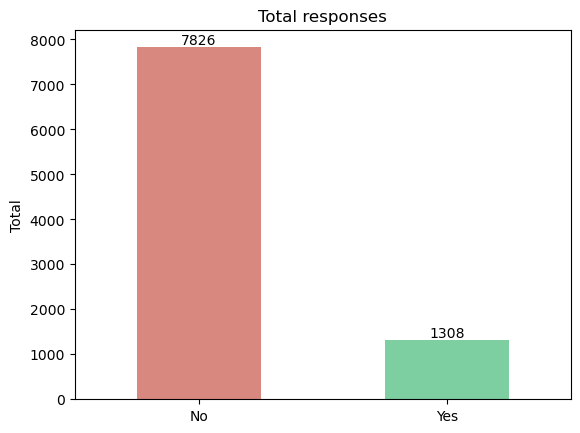

In [12]:
colors = ['#D98880','#7DCEA0']
barplot_response = data[['response']].value_counts().plot(kind = 'bar', color = colors)
for i in barplot_response.containers:
    barplot_response.bar_label(i,)
plt.ylabel("Total")
plt.xlabel("")
plt.title("Total responses")
etiquetas = ['No','Yes']
plt.xticks(range(len(etiquetas)), etiquetas, rotation=0, ha='center')

In [13]:
plot = data[['sales_channel','response']]

In [14]:
plot


,sales_channel,response
0,Agent,No
1,Call Center,No
2,Call Center,No
3,Branch,Yes
6,Branch,No
...,...,...
10903,Branch,No
10904,Branch,No
10906,Branch,No
10907,Web,No


In [15]:
plot2 = plot.groupby(["sales_channel", "response"])["sales_channel"].count().unstack()

In [16]:
plot2

response,No,Yes
sales_channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [17]:
plot2['percent'] = ((plot2['Yes']/(plot2['No'] + plot2['Yes']))*100).round(2)

In [18]:
plot2 = plot2.sort_values(by = 'percent', ascending = False)

In [19]:
plot2

response,No,Yes,percent
sales_channel,,,
Agent,2811,666,19.15
Web,1169,156,11.77
Branch,2273,294,11.45
Call Center,1573,192,10.88


([<matplotlib.axis.XTick at 0x28858c41a50>,
 [Text(0, 0, 'Agent'),
  Text(1, 0, 'Web'),
  Text(2, 0, 'Branch'),
  Text(3, 0, 'Call center')])

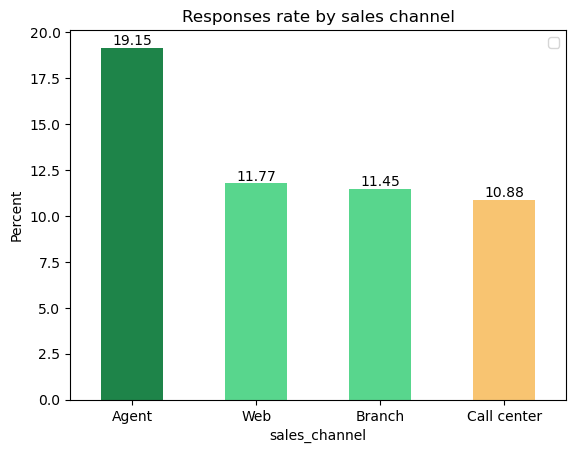

In [20]:
Colors = ['#1E8449','#58D68D','#58D68D','#F8C471']
barplot = plot2["percent"].plot(kind="bar",color=Colors)
barplot.legend(labels=[])
for i in barplot.containers:
    barplot.bar_label(i,)
plt.ylabel("Percent")
#plt.xlabel("Yes %")
plt.title("Responses rate by sales channel")
etiquetas = ['Agent', 'Web', 'Branch' ,'Call center']
plt.xticks(range(len(etiquetas)), etiquetas, rotation=0, ha='center')

In [21]:
#Show a plot of the response rate by the total claim amount

In [22]:
data['total_claim_amount'].value_counts()

total_claim_amount
316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
104.427573      1
272.737308      1
380.069056      1
605.137484      1
618.288849      1
Name: count, Length: 5106, dtype: int64

In [23]:
plot = data[['total_claim_amount','response']]

In [24]:
plot.sort_values(by = 'total_claim_amount', ascending = False)

,total_claim_amount,response
4481,2893.239678,No
7866,2759.794354,No
9807,2552.343856,No
1319,2452.894264,No
641,2345.413441,No
...,...,...
10529,0.769185,No
7567,0.517753,No
6197,0.423310,No
4091,0.382107,No


In [25]:
plot['claim_amount_cat'] = np.where(plot['total_claim_amount']<500, 'Under 500',
                np.where((plot['total_claim_amount'] >=500) & (plot['total_claim_amount']<1000), '500 - 999',
                np.where((plot['total_claim_amount'] >=1000) & (plot['total_claim_amount'] <1500), '1000 - 1499',
                np.where((plot['total_claim_amount'] >= 1500) & (plot['total_claim_amount'] <2000), '1500 - 1999',
                np.where((plot['total_claim_amount'] >= 2000) & (plot['total_claim_amount'] <2500), '2000 - 2499', '+ 2500')))))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15044\2951642552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['claim_amount_cat'] = np.where(plot['total_claim_amount']<500, 'Under 500',


In [26]:
plot.sort_values(by='total_claim_amount', ascending = False)

,total_claim_amount,response,claim_amount_cat
4481,2893.239678,No,+ 2500
7866,2759.794354,No,+ 2500
9807,2552.343856,No,+ 2500
1319,2452.894264,No,2000 - 2499
641,2345.413441,No,2000 - 2499
...,...,...,...
10529,0.769185,No,Under 500
7567,0.517753,No,Under 500
6197,0.423310,No,Under 500
4091,0.382107,No,Under 500


In [27]:
plot2 = plot.groupby(["claim_amount_cat", "response"])["claim_amount_cat"].count().unstack()

In [28]:
plot2

response,No,Yes
claim_amount_cat,,
+ 2500,3.0,NaN
1000 - 1499,277.0,60.0
1500 - 1999,47.0,NaN
2000 - 2499,16.0,NaN
500 - 999,2146.0,396.0
Under 500,5337.0,852.0


In [29]:
plot2 = plot2.fillna(0)

In [30]:
plot2['percent'] = ((plot2['Yes']/(plot2['No'] + plot2['Yes']))*100).round(2)

In [31]:
plot2

response,No,Yes,percent
claim_amount_cat,,,
+ 2500,3.0,0.0,0.00
1000 - 1499,277.0,60.0,17.80
1500 - 1999,47.0,0.0,0.00
2000 - 2499,16.0,0.0,0.00
500 - 999,2146.0,396.0,15.58
Under 500,5337.0,852.0,13.77


Text(0.5, 1.0, 'Responses rate by total claim amount')

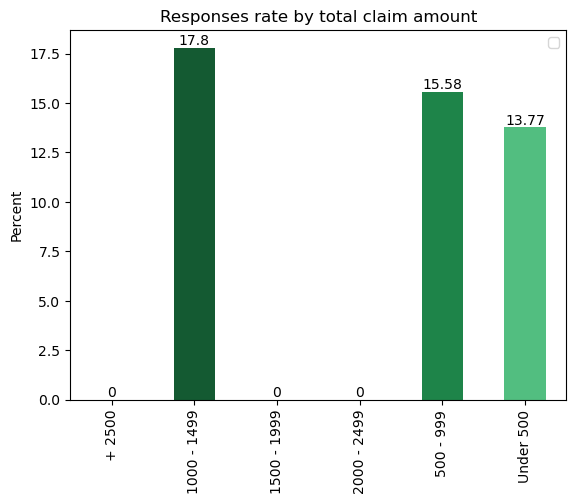

In [32]:
Colors = ['#A93226','#145A32','#145A32','#145A32','#1E8449','#52BE80']
barplot = plot2["percent"].plot(kind="bar",color=Colors)
barplot.legend(labels=[])
for i in barplot.containers:
    barplot.bar_label(i,)
plt.ylabel("Percent")
plt.xlabel("")
plt.title("Responses rate by total claim amount")
#etiquetas = ['Agent', 'Web', 'Branch' ,'Call center']
#plt.xticks(range(len(etiquetas)), etiquetas, rotation=50, ha='center')

In [33]:
#Show a plot of the response rate by income.

In [34]:
filter_data = data[data['response']=='Yes']


In [35]:
filter_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize
15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,79487,...,87,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize
19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,41479,...,38,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large
27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,63774,...,63,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,ME22430,Nevada,2453.570794,Yes,Basic,Bachelor,2/9/11,Medical Leave,M,29735,...,92,0.0,1,Personal Auto,Personal L2,Offer1,Agent,331.200000,Four-Door Car,Medsize
10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,57693,...,56,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize
10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,57693,...,56,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize
10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,52583,...,59,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small


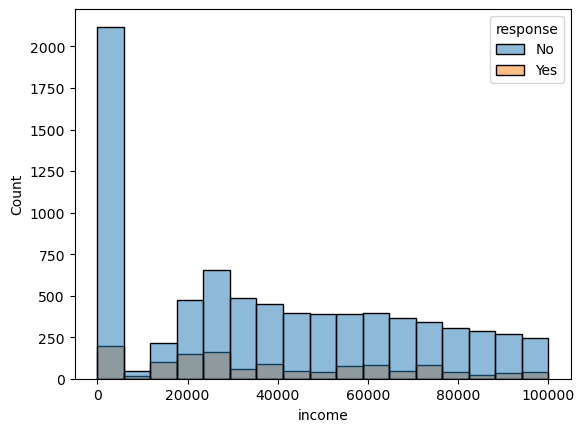

In [36]:
histplot = sns.histplot(x = data['income'],hue = data['response'])


In [37]:
#- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 10908
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   int64

In [39]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = ['object'])

In [40]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996


In [41]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


<Axes: xlabel='customer_lifetime_value', ylabel='Count'>

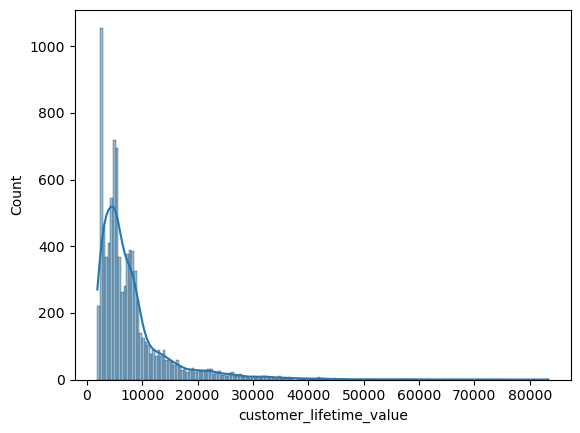

In [66]:
sns.histplot(x = data['customer_lifetime_value'],kde = True)


<Axes: xlabel='income', ylabel='Count'>

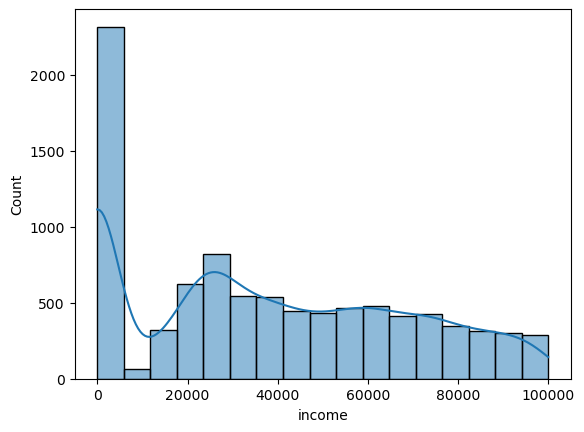

In [65]:
sns.histplot(x = data['income'],kde = True)


In [48]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

<Axes: xlabel='monthly_premium_auto', ylabel='Count'>

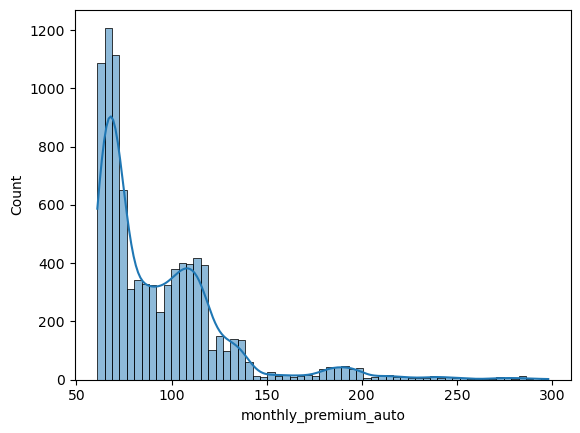

In [59]:
sns.histplot(x = data['monthly_premium_auto'],kde = True)


<Axes: xlabel='months_since_last_claim', ylabel='Count'>

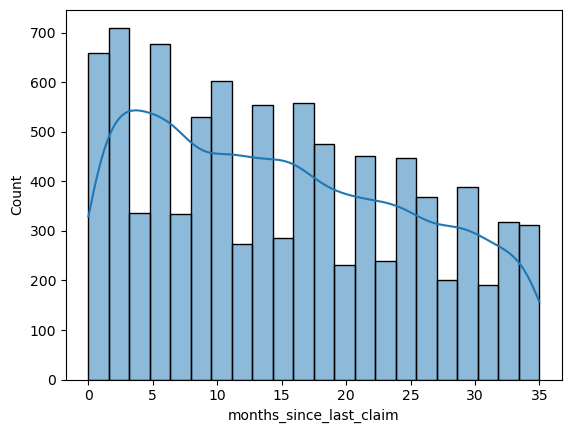

In [60]:
sns.histplot(x = data['months_since_last_claim'],kde = True)


<Axes: xlabel='months_since_policy_inception', ylabel='Count'>

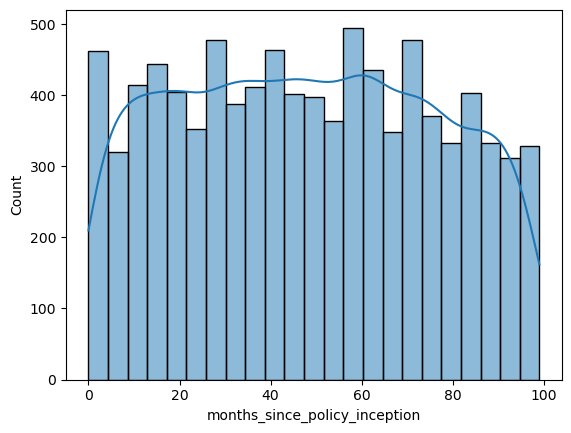

In [61]:
sns.histplot(x = data['months_since_policy_inception'],kde = True)


<Axes: xlabel='number_of_open_complaints', ylabel='Count'>

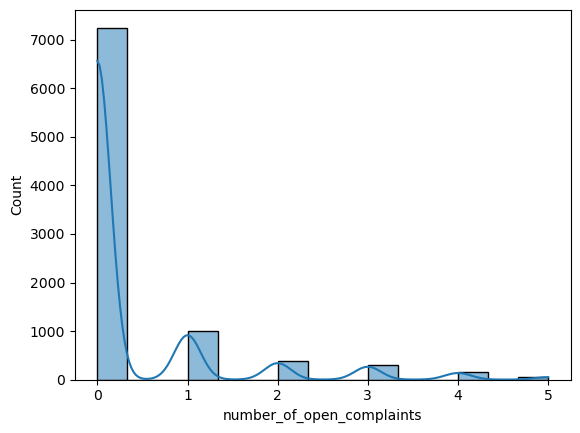

In [62]:
sns.histplot(x = data['number_of_open_complaints'],kde = True
            )


<Axes: xlabel='number_of_policies', ylabel='Count'>

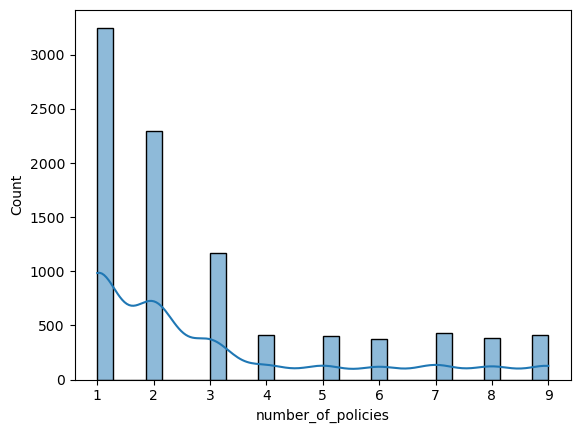

In [63]:
sns.histplot(x = data['number_of_policies'],kde = True)


<Axes: xlabel='total_claim_amount', ylabel='Count'>

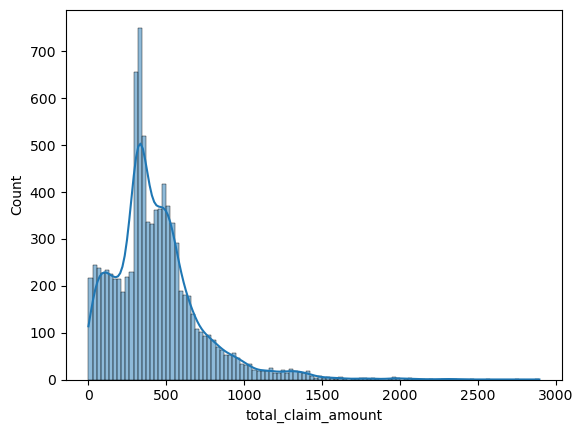

In [64]:
sns.histplot(x = data['total_claim_amount'],kde = True)


Text(0.5, 1.0, 'Correlation between numerical variables')

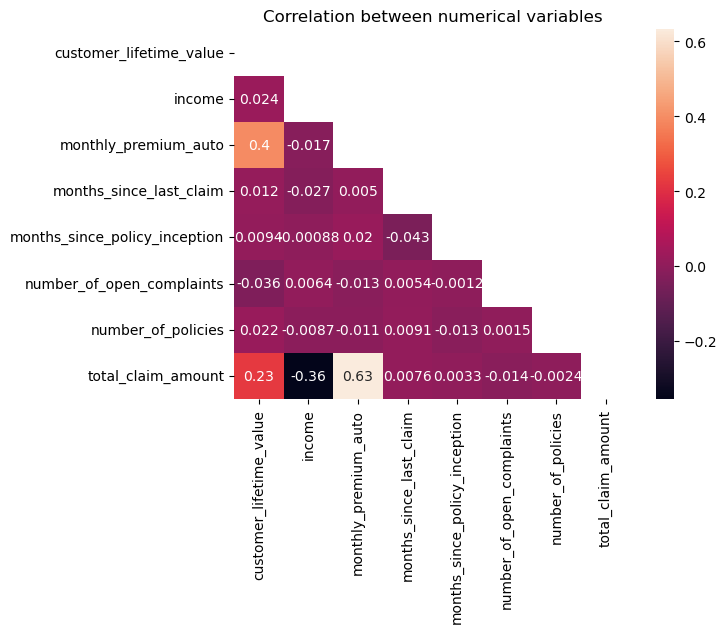

In [72]:
corrnum = numerical.corr()
mask = np.triu(np.ones_like(corrnum, dtype=bool))
corr_var = sns.heatmap(corrnum,annot=True,mask=mask)
plt.title("Correlation between numerical variables")

